In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.metrics import geometric_mean_score
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, roc_curve, RocCurveDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import BernoulliNB

##Mounting Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Reading the dataset

In [ ]:
train_dataset = pd.read_csv('/content/drive/MyDrive/AI_Project/train.csv')
test_dataset= pd.read_csv('/content/drive/MyDrive/AI_Project/test.csv')

In [ ]:
dataset=train_dataset
dataset2=test_dataset

In [ ]:
dataset

,Id,Age,Sex,NeuroSymptomsType,BP,Cholesterol,heart_disease,work_type,avg_glucose_level,hypertension,CerebralPerfusion,stroke
0,1,40,M,Mild,140,289,0,Employed,172,N,Reduced,0
1,2,49,F,Moderate,160,180,0,Employed,156,N,Normal,1
2,3,37,M,Mild,130,283,0,Unemployed,98,N,Reduced,0
3,4,48,F,Severe,138,214,0,Employed,108,Y,Normal,1
4,5,54,M,Moderate,150,195,0,Employed,122,N,Reduced,0
...,...,...,...,...,...,...,...,...,...,...,...,...
730,914,45,M,None,110,264,0,Employed,132,N,Normal,1
731,915,68,M,Severe,144,193,1,Employed,141,N,Normal,1
732,916,57,M,Severe,130,131,0,Employed,115,Y,Normal,1
733,917,57,F,Mild,130,236,0,Self-employed,174,N,Normal,1


In [ ]:
dataset2

,Id,Age,Sex,NeuroSymptomsType,BP,Cholesterol,heart_disease,work_type,avg_glucose_level,hypertension,CerebralPerfusion
0,401,50,F,Severe,160,0,1,Employed,110,N,Normal
1,402,51,M,Severe,130,0,1,Unemployed,163,N,Normal
2,403,65,M,Severe,145,0,1,Unemployed,67,N,Normal
3,404,52,M,Severe,135,0,1,Employed,128,Y,Normal
4,405,47,M,Moderate,110,0,1,Employed,120,Y,Normal
...,...,...,...,...,...,...,...,...,...,...,...
178,579,57,M,Severe,156,173,0,Self-employed,119,Y,Down
179,580,69,M,Severe,145,289,1,Unemployed,110,Y,Normal
180,581,51,M,Severe,131,152,1,Self-employed,130,Y,Normal
181,582,48,M,Severe,140,208,0,Employed,159,Y,Reduced


##Data Exploration

###Searching the available columns

In [ ]:
dataset.columns

Index(['Id', 'Age', 'Sex', 'NeuroSymptomsType', 'BP', 'Cholesterol',
       'heart_disease', 'work_type', 'avg_glucose_level', 'hypertension',
       'CerebralPerfusion', 'stroke'],
      dtype='object')

In [ ]:
dataset2.columns

Index(['Id', 'Age', 'Sex', 'NeuroSymptomsType', 'BP', 'Cholesterol',
       'heart_disease', 'work_type', 'avg_glucose_level', 'hypertension',
       'CerebralPerfusion'],
      dtype='object')

In [ ]:
dataset_cat=dataset[['Sex', 'hypertension', 'heart_disease', 'NeuroSymptomsType','work_type', 'CerebralPerfusion','stroke']]
dataset2_cat=dataset2[['Sex', 'hypertension', 'heart_disease', 'NeuroSymptomsType','work_type', 'CerebralPerfusion']]

In [ ]:
for i in dataset_cat.columns:
    print(dataset_cat[i].unique())

['M' 'F']
['N' 'Y']
[0 1]
['Mild' 'Moderate' 'Severe' 'None']
['Employed ' 'Unemployed ' 'Self-employed ']
['Reduced' 'Normal' 'Down']
[0 1]


In [ ]:
for i in dataset_cat.columns:
    print(dataset_cat[i].value_counts())

M    548
F    187
Name: Sex, dtype: int64
N    484
Y    251
Name: hypertension, dtype: int64
0    596
1    139
Name: heart_disease, dtype: int64
Severe      373
Mild        162
Moderate    161
None         39
Name: NeuroSymptomsType, dtype: int64
Employed          468
Self-employed     171
Unemployed         96
Name: work_type, dtype: int64
Reduced    352
Normal     346
Down        37
Name: CerebralPerfusion, dtype: int64
0    369
1    366
Name: stroke, dtype: int64


In [ ]:
dataset.describe()

,Id,Age,Sex,NeuroSymptomsType,BP,Cholesterol,heart_disease,work_type,avg_glucose_level,hypertension,CerebralPerfusion,stroke
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,451.408163,52.144218,0.745578,1.847619,131.922449,211.112925,0.189116,0.493878,140.391837,0.341497,1.428571,0.497959
std,294.629952,9.272349,0.435832,1.259803,18.470117,103.100871,0.391867,0.715460,25.266351,0.474535,0.588259,0.500336
min,1.000000,28.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000
25%,184.500000,45.000000,0.000000,1.000000,120.000000,187.000000,0.000000,0.000000,122.000000,0.000000,1.000000,0.000000
50%,368.000000,53.000000,1.000000,3.000000,130.000000,230.000000,0.000000,0.000000,142.000000,0.000000,1.000000,0.000000
75%,734.500000,59.000000,1.000000,3.000000,140.000000,270.000000,0.000000,1.000000,160.000000,1.000000,2.000000,1.000000
max,918.000000,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,2.000000,1.000000


In [ ]:
dataset.corr()

,Id,Age,Sex,NeuroSymptomsType,BP,Cholesterol,heart_disease,work_type,avg_glucose_level,hypertension,CerebralPerfusion,stroke
Id,1.000000,0.306506,-0.049078,0.088722,0.016786,0.120923,0.032560,0.089106,0.203832,0.015782,-0.115988,0.047204
Age,0.306506,1.000000,-0.007427,0.193158,0.259473,-0.069924,0.172460,0.174489,-0.342012,0.163115,-0.221905,0.245274
Sex,-0.049078,-0.007427,1.000000,0.184870,0.003300,-0.188735,0.098634,-0.046509,-0.155483,0.157175,-0.116147,0.294383
NeuroSymptomsType,0.088722,0.193158,0.184870,1.000000,0.038545,-0.160749,0.166082,0.089655,-0.341946,0.440400,-0.391573,0.561475
BP,0.016786,0.259473,0.003300,0.038545,1.000000,0.104501,0.034970,0.110021,-0.111975,0.148674,-0.062015,0.108414
Cholesterol,0.120923,-0.069924,-0.188735,-0.160749,0.104501,1.000000,-0.271884,0.002253,0.214863,-0.017692,0.087931,-0.227061
heart_disease,0.032560,0.172460,0.098634,0.166082,0.034970,-0.271884,1.000000,0.060018,-0.087578,0.040530,-0.133400,0.255598
work_type,0.089106,0.174489,-0.046509,0.089655,0.110021,0.002253,0.060018,1.000000,-0.078625,0.068365,-0.069828,0.084646
avg_glucose_level,0.203832,-0.342012,-0.155483,-0.341946,-0.111975,0.214863,-0.087578,-0.078625,1.000000,-0.360816,0.324263,-0.394376
hypertension,0.015782,0.163115,0.157175,0.440400,0.148674,-0.017692,0.040530,0.068365,-0.360816,1.000000,-0.402993,0.464863


##Data Visualization

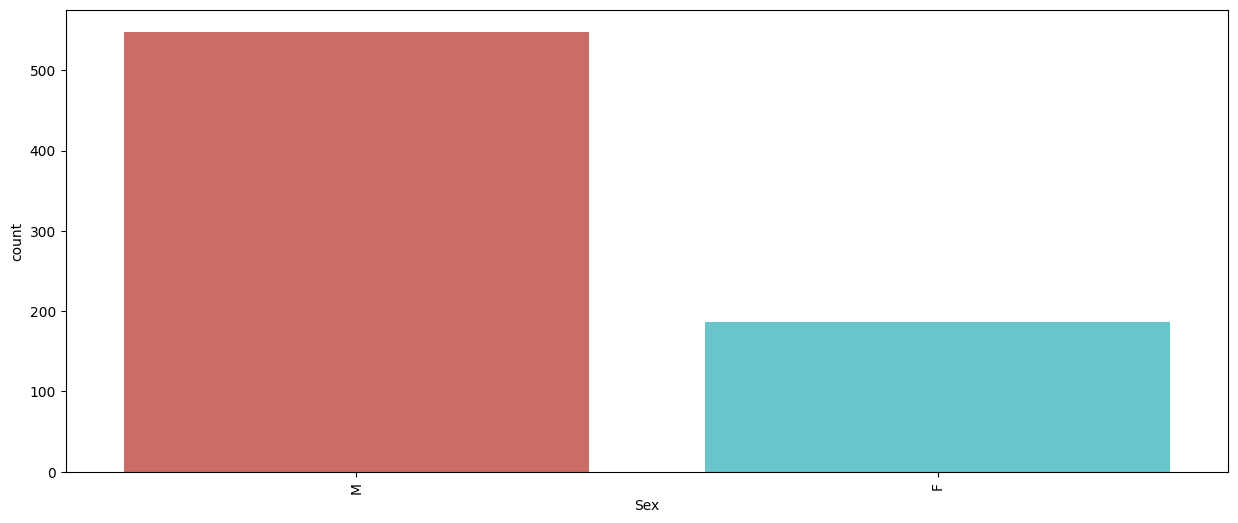

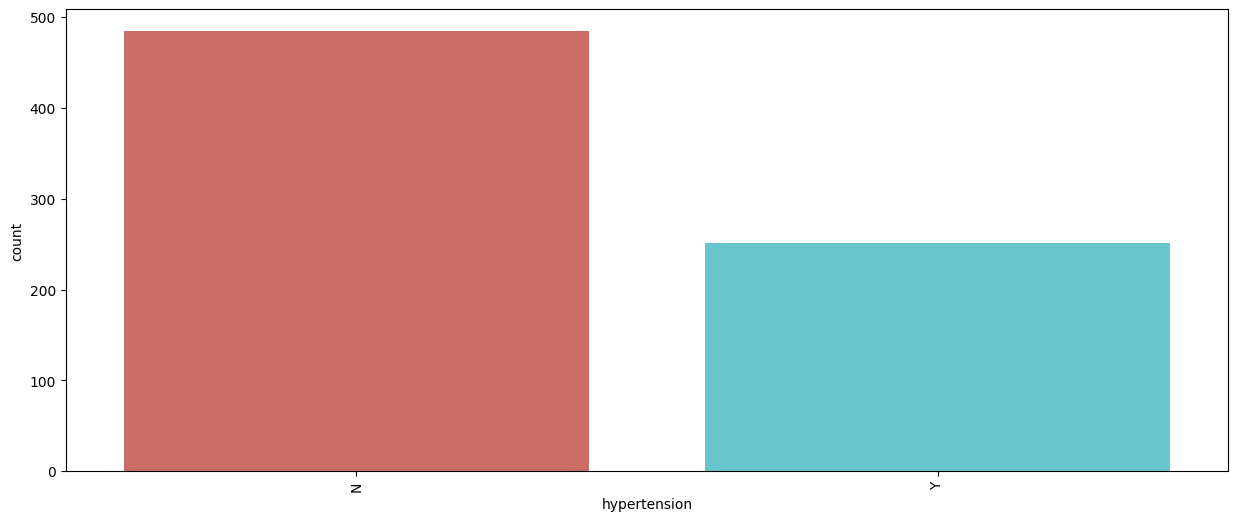

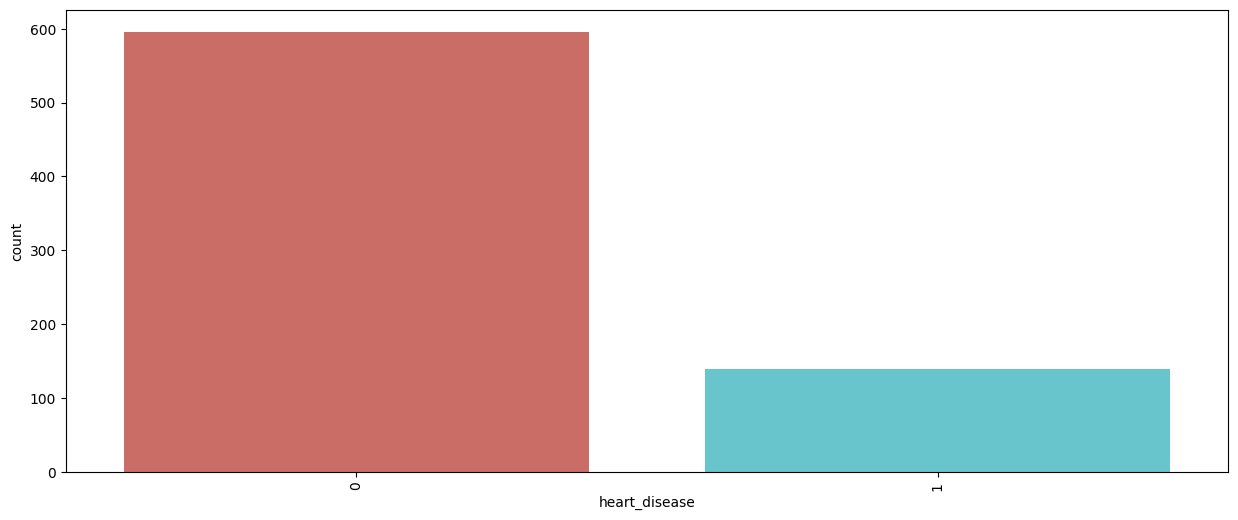

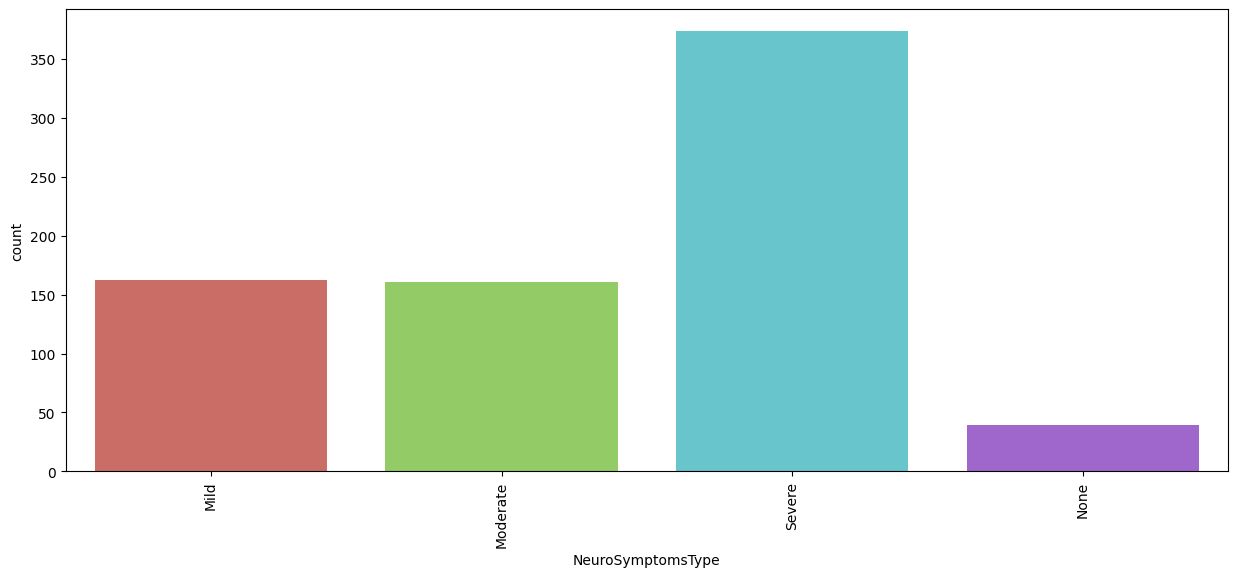

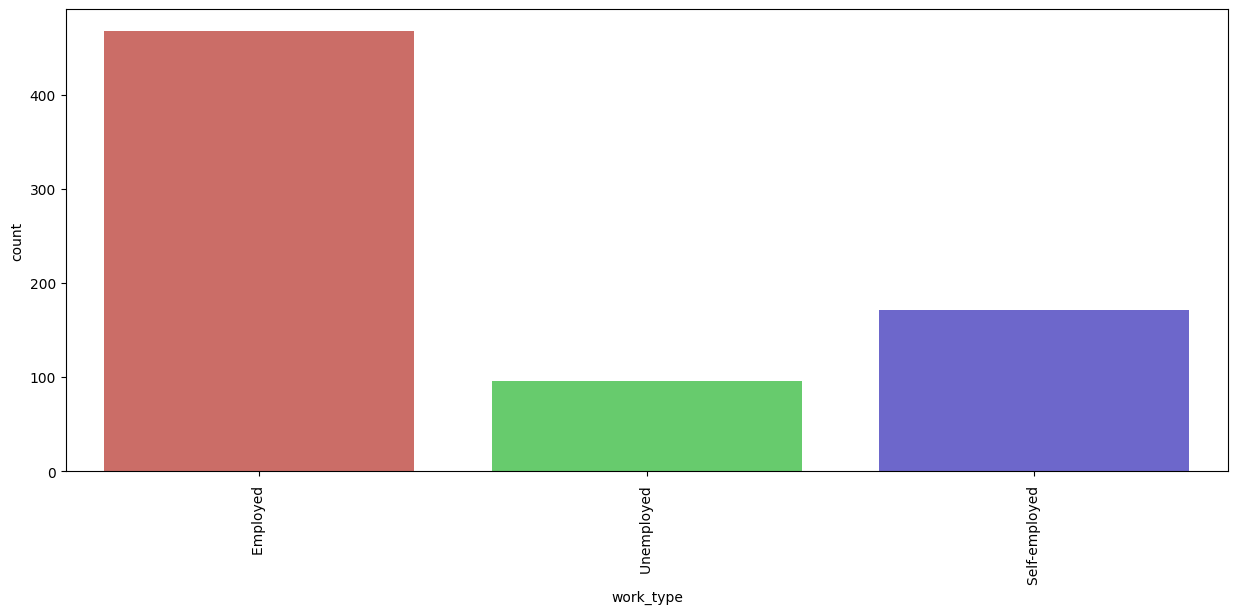

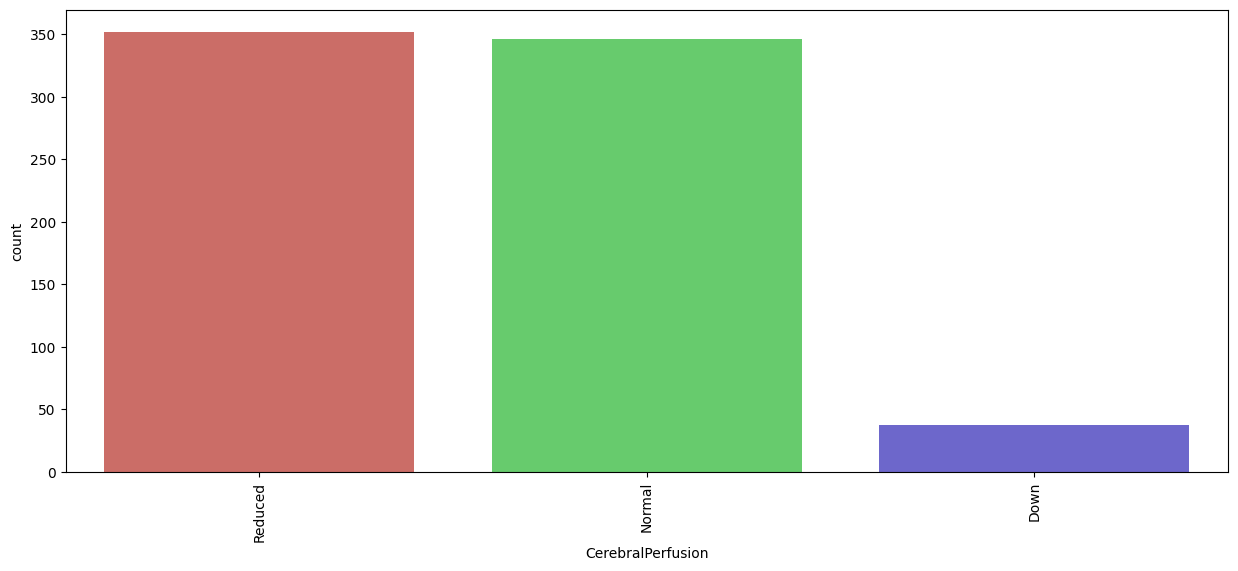

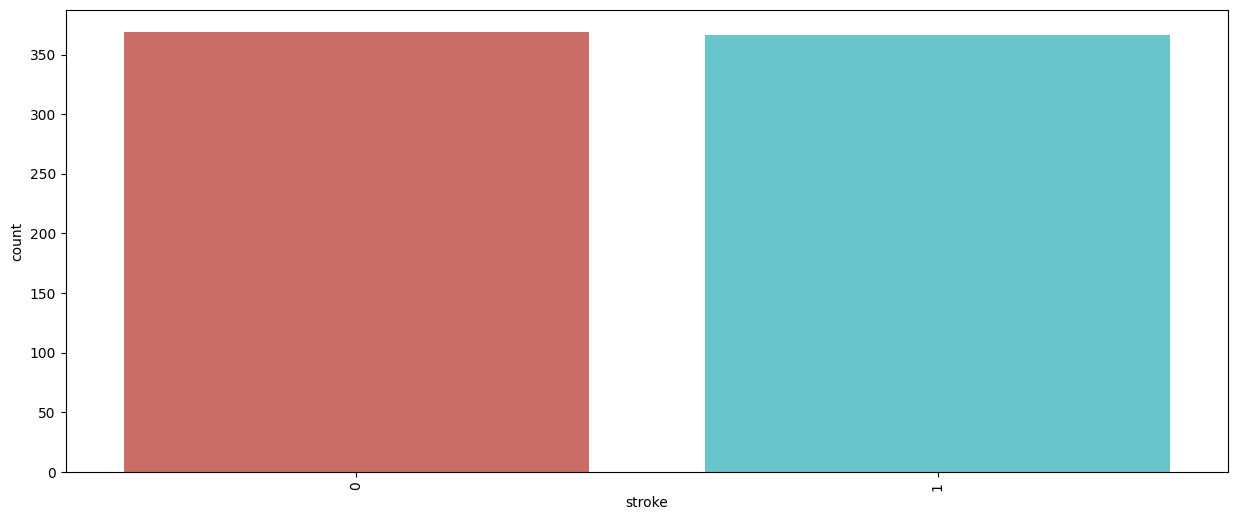

In [ ]:
for i in dataset_cat.columns:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=i, data=dataset_cat, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

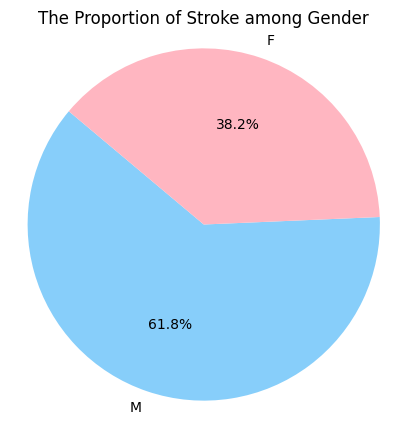

In [ ]:
temp = dataset.query('stroke == 0')

gender_counts = temp['Sex'].value_counts()
labels = gender_counts.index
values = gender_counts.values

colors = ['lightskyblue', 'lightpink']

plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("The Proportion of Stroke among Gender")
plt.axis('equal')
plt.show()

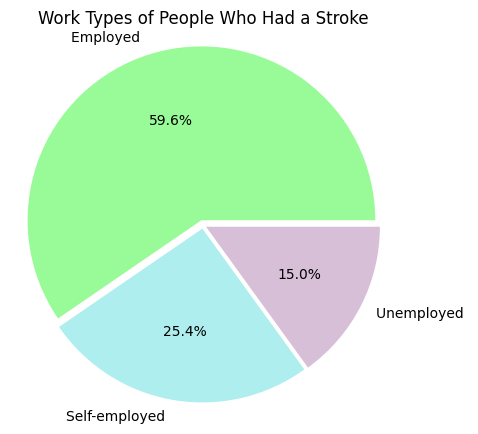

In [ ]:
job = dataset.groupby(dataset['work_type'])['stroke'].sum()
data_job = pd.DataFrame({'labels': job.index,
                         'values': job.values
                        })
colors2 = ['palegreen', 'paleturquoise', 'thistle', 'moccasin']

plt.figure(figsize=(5, 5))
plt.pie(data_job['values'], labels=data_job['labels'], colors=colors2, autopct='%1.1f%%', explode=[0.03, 0.02,0.02])
plt.title("Work Types of People Who Had a Stroke")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

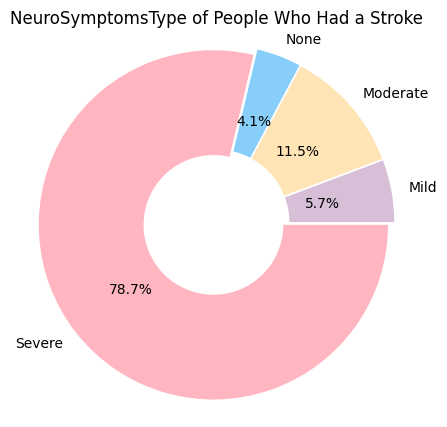

In [ ]:
Residence = dataset.groupby(dataset['NeuroSymptomsType'])['stroke'].sum()

# Create a DataFrame for the pie chart
data_Residence = pd.DataFrame({'labels': Residence.index, 'values': Residence.values})
colors3 = ['thistle', 'moccasin','lightskyblue', 'lightpink']
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(data_Residence['values'], labels=data_Residence['labels'], autopct='%1.1f%%', colors=colors3,
        explode=[0.02, 0.02, 0.02, 0.02], wedgeprops=dict(width=0.6))
plt.title('NeuroSymptomsType of People Who Had a Stroke')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

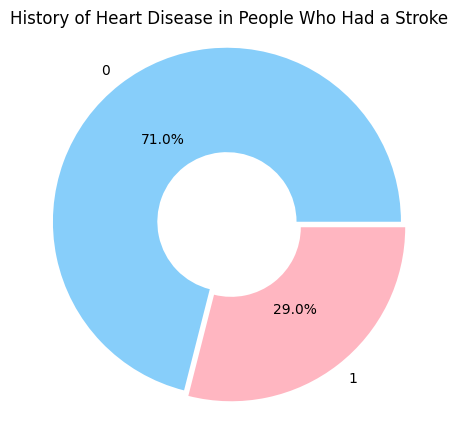

In [ ]:
Married = dataset.groupby(dataset['heart_disease'])['stroke'].sum()

# Create a DataFrame for the pie chart
data_Married = pd.DataFrame({'labels': Married.index, 'values': Married.values})
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(data_Married['values'], labels=data_Married['labels'], autopct='%1.1f%%', colors=colors,
        explode=[0.02, 0.02], wedgeprops=dict(width=0.6))
plt.title('History of Heart Disease in People Who Had a Stroke')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##Feature Selection

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['NeuroSymptomsType']= label_encoder.fit_transform(dataset['NeuroSymptomsType'])
dataset['Sex']= label_encoder.fit_transform(dataset['Sex'])
dataset['work_type']= label_encoder.fit_transform(dataset['work_type'])
dataset['hypertension']= label_encoder.fit_transform(dataset['hypertension'])
dataset['CerebralPerfusion']= label_encoder.fit_transform(dataset['CerebralPerfusion'])

dataset2['NeuroSymptomsType']= label_encoder.fit_transform(dataset2['NeuroSymptomsType'])
dataset2['Sex']= label_encoder.fit_transform(dataset2['Sex'])
dataset2['work_type']= label_encoder.fit_transform(dataset2['work_type'])
dataset2['hypertension']= label_encoder.fit_transform(dataset2['hypertension'])
dataset2['CerebralPerfusion']= label_encoder.fit_transform(dataset2['CerebralPerfusion'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Id                 735 non-null    int64
 1   Age                735 non-null    int64
 2   Sex                735 non-null    int64
 3   NeuroSymptomsType  735 non-null    int64
 4   BP                 735 non-null    int64
 5   Cholesterol        735 non-null    int64
 6   heart_disease      735 non-null    int64
 7   work_type          735 non-null    int64
 8   avg_glucose_level  735 non-null    int64
 9   hypertension       735 non-null    int64
 10  CerebralPerfusion  735 non-null    int64
 11  stroke             735 non-null    int64
dtypes: int64(12)
memory usage: 69.0 KB


In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Id                 183 non-null    int64
 1   Age                183 non-null    int64
 2   Sex                183 non-null    int64
 3   NeuroSymptomsType  183 non-null    int64
 4   BP                 183 non-null    int64
 5   Cholesterol        183 non-null    int64
 6   heart_disease      183 non-null    int64
 7   work_type          183 non-null    int64
 8   avg_glucose_level  183 non-null    int64
 9   hypertension       183 non-null    int64
 10  CerebralPerfusion  183 non-null    int64
dtypes: int64(11)
memory usage: 15.9 KB


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Id                 735 non-null    int64
 1   Age                735 non-null    int64
 2   Sex                735 non-null    int64
 3   NeuroSymptomsType  735 non-null    int64
 4   BP                 735 non-null    int64
 5   Cholesterol        735 non-null    int64
 6   heart_disease      735 non-null    int64
 7   work_type          735 non-null    int64
 8   avg_glucose_level  735 non-null    int64
 9   hypertension       735 non-null    int64
 10  CerebralPerfusion  735 non-null    int64
 11  stroke             735 non-null    int64
dtypes: int64(12)
memory usage: 69.0 KB


In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Id                 183 non-null    int64
 1   Age                183 non-null    int64
 2   Sex                183 non-null    int64
 3   NeuroSymptomsType  183 non-null    int64
 4   BP                 183 non-null    int64
 5   Cholesterol        183 non-null    int64
 6   heart_disease      183 non-null    int64
 7   work_type          183 non-null    int64
 8   avg_glucose_level  183 non-null    int64
 9   hypertension       183 non-null    int64
 10  CerebralPerfusion  183 non-null    int64
dtypes: int64(11)
memory usage: 15.9 KB


In [ ]:
X_train = dataset.iloc[:, 1:11].values
y_train = dataset.iloc[:, 11].values

dataset3 = pd.read_csv('/content/drive/MyDrive/AI_Project/Label.csv')

X_test = dataset2.iloc[:, 1:].values
y_test = dataset3.iloc[:, 1].values

In [ ]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      183 non-null    int64
 1   stroke  183 non-null    int64
dtypes: int64(2)
memory usage: 3.0 KB


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(735, 10)
(735,)
(183, 10)
(183,)


##Training

LogisticRegression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score:  0.8743169398907104
F1 score:  0.9235880398671096
Precision score:  0.8742138364779874
Recall score:  0.9788732394366197


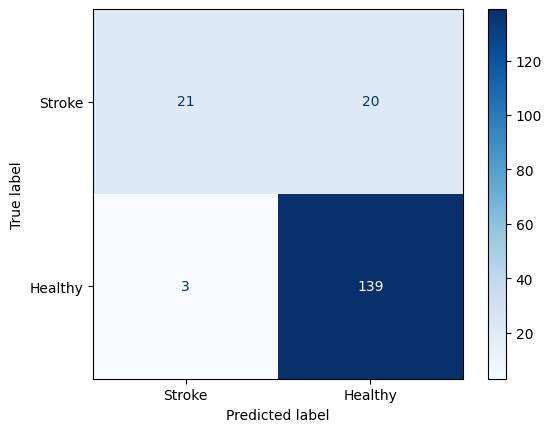

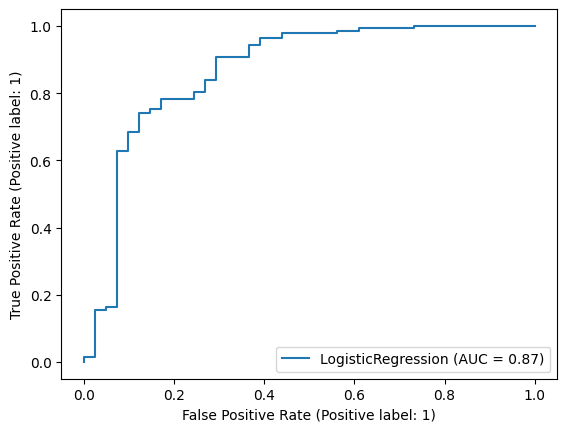

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
Y_pred = clf.predict(X_test)
clf.predict_proba(X_test)


cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Stroke','Healthy'])

cmd.plot(cmap=plt.cm.Blues)

print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

SVM

Accuracy score:  0.8852459016393442
F1 score:  0.9278350515463918
Precision score:  0.9060402684563759
Recall score:  0.9507042253521126


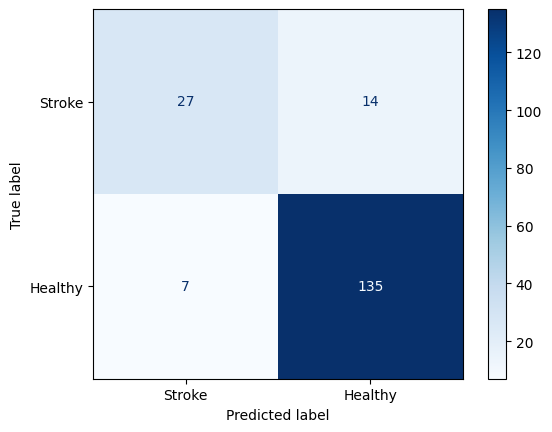

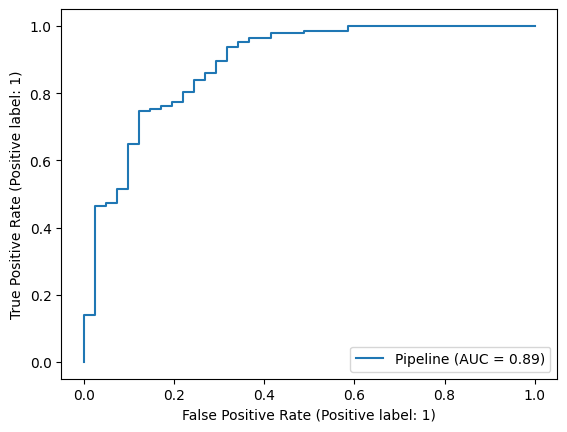

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
Y_pred= clf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Stroke','Healthy'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

In [ ]:
GaussianNB

Accuracy score:  0.8688524590163934
F1 score:  0.9215686274509804
Precision score:  0.8597560975609756
Recall score:  0.9929577464788732


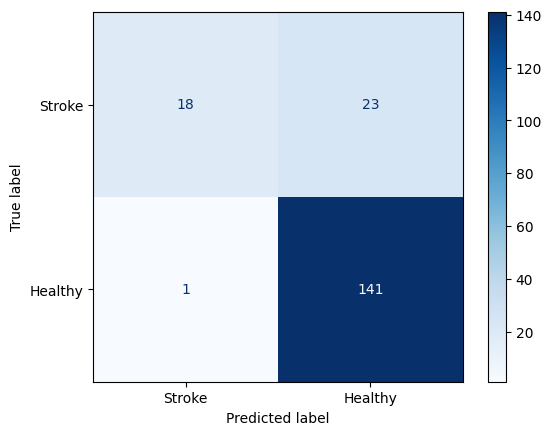

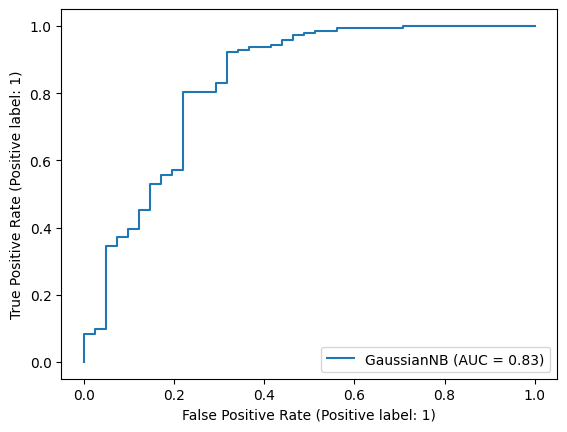

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Stroke','Healthy'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

KNeighborsClassifier

Accuracy score:  0.7377049180327869
F1 score:  0.8309859154929577
Precision score:  0.8309859154929577
Recall score:  0.8309859154929577


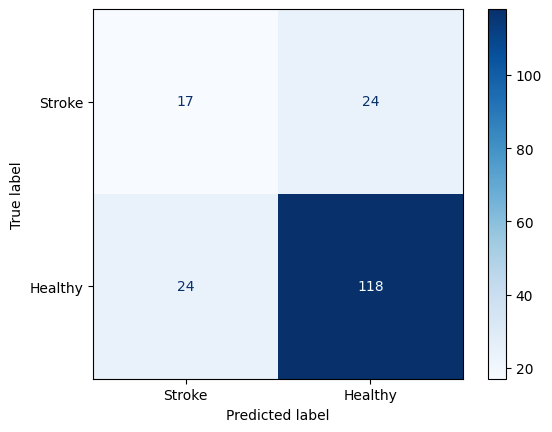

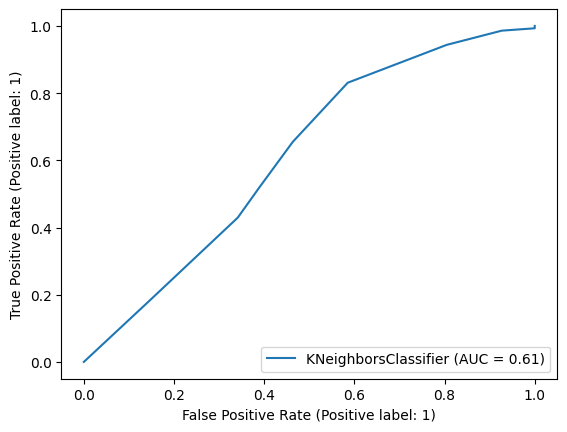

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train)
Y_pred = neigh.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Stroke','Healthy'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(neigh, X_test, y_test)



RandomForestClassifier

Accuracy score:  0.8688524590163934
F1 score:  0.9178082191780823
Precision score:  0.8933333333333333
Recall score:  0.9436619718309859


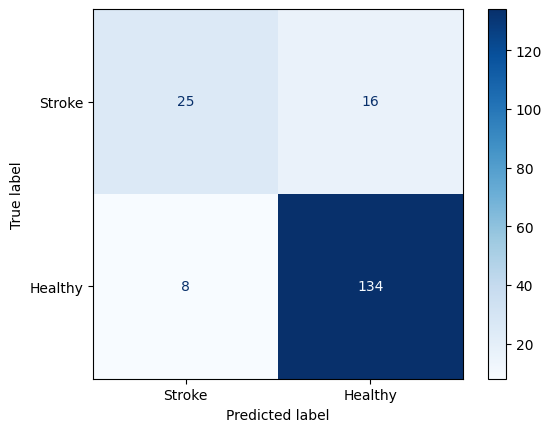

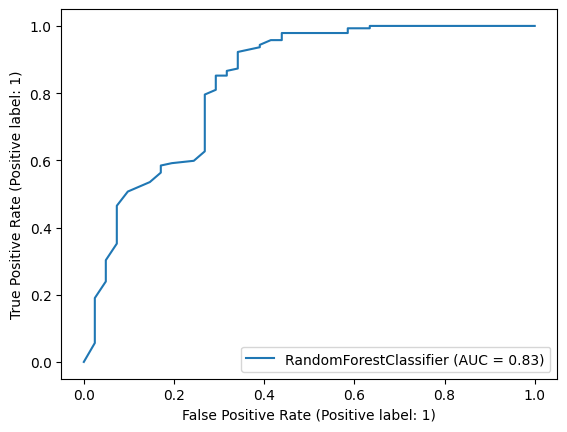

In [ ]:
rf = RandomForestClassifier(max_depth=20, random_state=0)
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Stroke','Healthy'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)

DecisionTreeClassifier

Accuracy score:  0.7650273224043715
F1 score:  0.8458781362007168
Precision score:  0.8613138686131386
Recall score:  0.8309859154929577


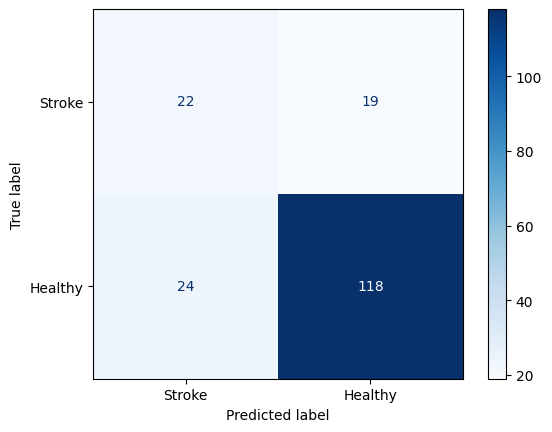

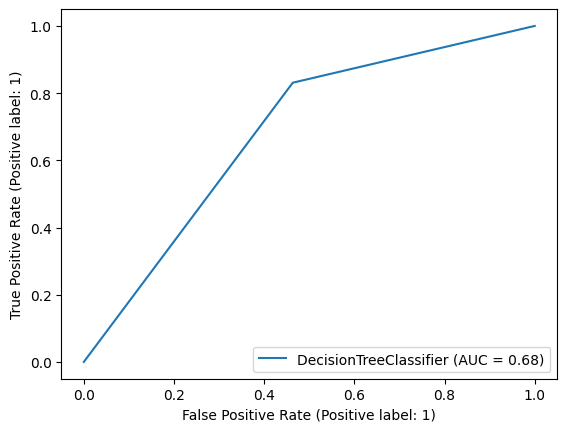

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
Y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Stroke','Healthy'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(dt, X_test, y_test)